Program 1

Accuracy: 0.495
Precision: 0.5454545454545454
Recall: 0.5405405405405406
F1-score: 0.5429864253393665
MCC: -0.02123465477162541
ROC AUC: 0.4893713938657759


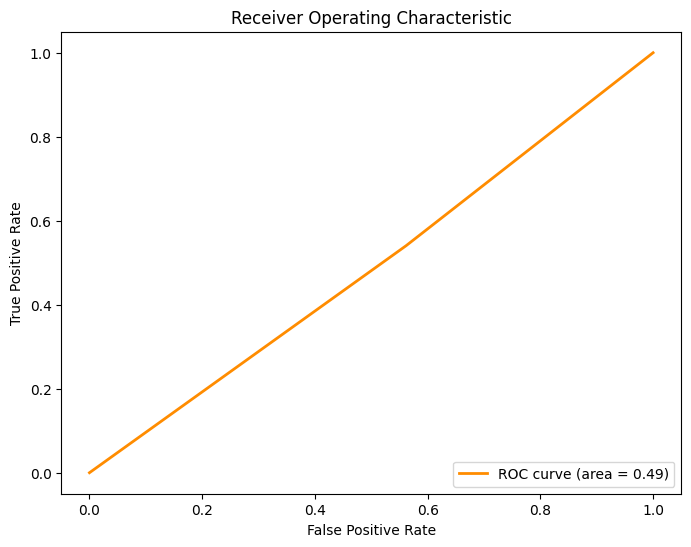

accuracy 0.495
precision 0.5454545454545454
recall 0.5405405405405406
f1 0.5429864253393665
mcc -0.02123465477162541
roc_auc 0.4893713938657759


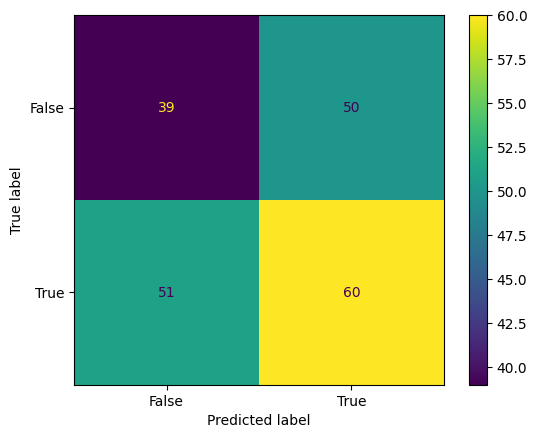

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,confusion_matrix,matthews_corrcoef,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# manual calculation
y_pred=np.random.randint(2,size=len(y_test))
cm=confusion_matrix(y_test,y_pred)

tp=cm [1,1]
tn=cm [0,0]
fp=cm [0,1]
fn=cm [1,0]

acc=(tp+tn)/(tp+tn+fp+fn)
prec=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*(prec*rec)/(prec+rec)
mcc=((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",rec)
print("F1-score:",f1)
print("MCC:",mcc)
print("ROC AUC:",roc_auc)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#sklearn library
print('accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('f1',f1_score(y_test,y_pred))
print('mcc',matthews_corrcoef(y_test,y_pred))
print('roc_auc',roc_auc)

disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.show()


Program 2

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,confusion_matrix,matthews_corrcoef,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

data=pd.read_csv('/content/PlayTennis.csv')
data.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [18]:
target=data['Play Tennis']
input=data.drop('Play Tennis',axis=1)
input.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [19]:
from sklearn.preprocessing import LabelEncoder
out=LabelEncoder()
input['outlook_encoder']=out.fit_transform(input['Outlook'])
temp=LabelEncoder()
input['temp_encoder']=temp.fit_transform(input['Temperature'])
hum=LabelEncoder()
input['hum_encoder']=hum.fit_transform(input['Humidity'])
wind=LabelEncoder()
input['wind_encoder']=wind.fit_transform(input['Wind'])

input.drop(['Outlook','Temperature','Humidity','Wind'],axis=1,inplace=True)
input.head()


,outlook_encoder,temp_encoder,hum_encoder,wind_encoder
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [20]:
targ=LabelEncoder()
target=targ.fit_transform(target)
target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

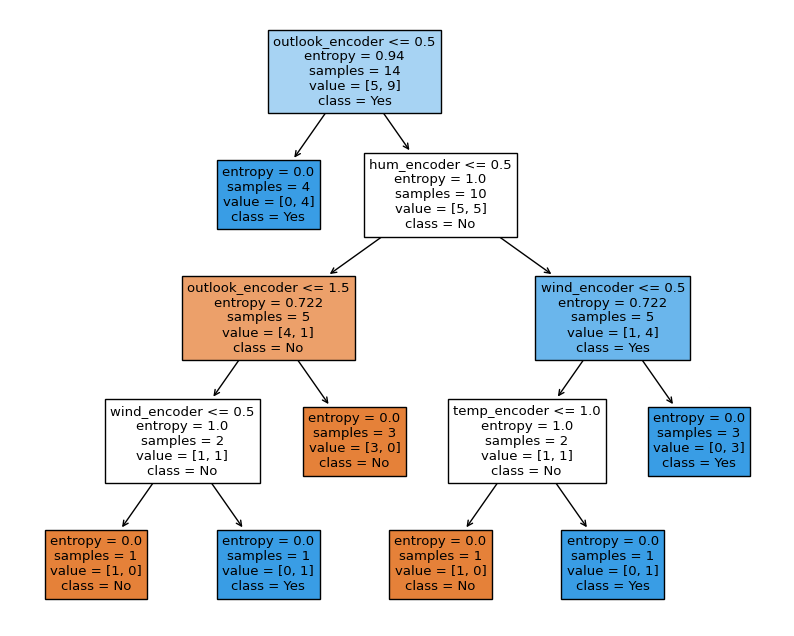

In [23]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(input,target)

plt.figure(figsize=(10,8))
plot_tree(model,filled=True,feature_names=input.columns,class_names=['No',"Yes"])
plt.show()

In [27]:
ans=model.predict([[1,2,0,1]])
print('play tennis' if ans[0]==1 else 'not play tennis')

play tennis


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Program 3**

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_curve,auc,confusion_matrix,matthews_corrcoef,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data=pd.read_csv('/content/advertising.csv')
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
target=data['Sales']
input=data.drop('Sales',axis='columns')
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2,random_state=42)

In [35]:
def ensemble_random_forest(n_tress):
  model=RandomForestClassifier(n_estimators=n_tress,criterion='entropy')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  acc=accuracy_score(y_test,y_pred)
  prec=precision_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  rec=recall_score(y_test,y_pred)

  return acc,prec,f1,rec

no_trees=[1,4,5,10]
ans={'acc':[],'prec':[],'f1':[],'rec':[]}
for i in no_trees:
  acc,prec,f1,rec=ensemble_random_forest(i)
  ans['acc'].append(acc)
  ans['prec'].append(prec)
  ans['f1'].append(f1)
  ans['rec'].append(rec)


plt.figure(figsize=(10,8))
plt.plot(no_trees,ans['acc'],label='accuracy')
plt.plot(no_trees,ans['prec'],label='precision')
plt.plot(no_trees,ans['f1'],label='f1')
plt.plot(no_trees,ans['rec'],label='recall')
plt.xlabel('no of trees')
plt.ylabel('score')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Unknown label type: 'continuous'

Program 4

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

data=pd.read_csv('/content/Housing.csv')
data.head()

X=data['price']
y=data['area']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train)

y_pred=model.predict(X_test.values.reshape(-1,1))

In [39]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('r2',r2)
print('mse',mse)

r2 0.2863227465807432
mse 2935124.125094529


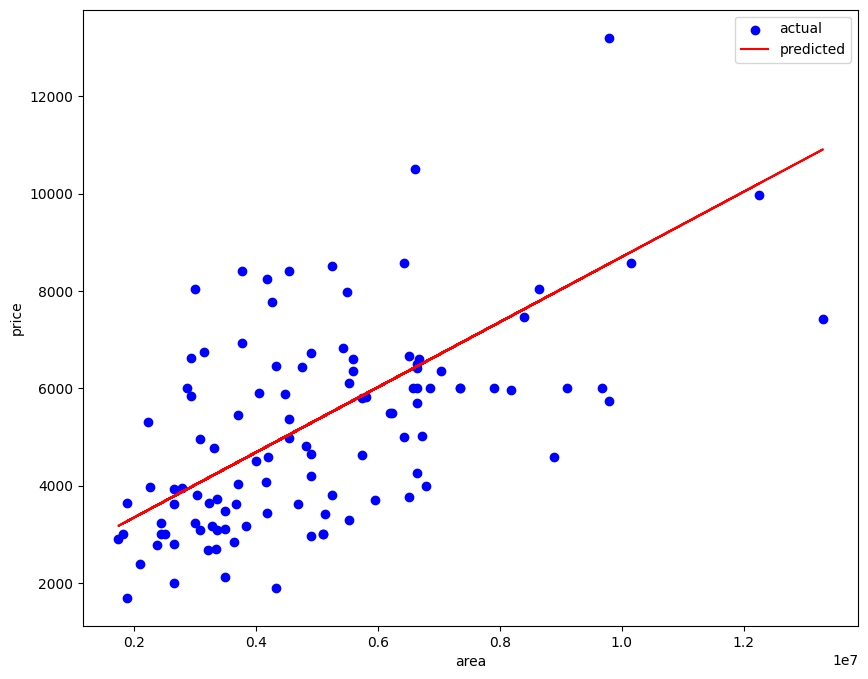

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,color='blue',label='actual')
plt.plot(X_test,y_pred,color='red',label='predicted')
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.show()

Program 5

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,confusion_matrix,matthews_corrcoef,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

data=pd.read_csv('/content/advertising.csv')
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [44]:
X=data['Sales']
y=data['Radio']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train.values.reshape(-1,1),y_train)

y_pred=model.predict(X_test.values.reshape(-1,1))

ValueError: Unknown label type: 'continuous'

In [45]:
con=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('accuracy',acc)
print('precision',prec)
print('recall',rec)
print('f1',f1)
print('rmse',rmse)

ValueError: Found input variables with inconsistent numbers of samples: [40, 109]

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[False,True])
disp.plot()
plt.show()


Program 6

In [52]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

print(iris_df.head())

X = iris_df.drop(columns='species')
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print("Predictions:", y_pred)
print("Actual:", y_test.values)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", class_report)

new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_prediction = nb_model.predict(new_sample)
print("New sample prediction:", new_prediction)

if(new_prediction[0]==0):
  print("Iris-setosa")
elif(new_prediction[0]==1):
  print("Iris-versicolor")
else:
  print("Iris-virginica")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Program 7

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values (if any)
# In this dataset, 0 values for Glucose, BloodPressure, SkinThickness, Insulin, and BMI can be considered as missing values.
# Replace 0s with the median of the column
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    df[column].replace(0, df[column].median(), inplace=True)

# Split the data into features and target
X = df.drop(columns='Outcome')
y = df['Outcome']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Implement the KNN algorithm from scratch
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Initialize the KNN model with k=3
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Print the predictions
print("Predictions:", y_pred)
print("Actual:", y_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", class_report)

# Function to find the best k
def find_best_k(X_train, y_train, X_test, y_test, max_k=20):
    accuracies = []
    for k in range(1, max_k + 1):
        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append((k, accuracy))
        print(f"k={k}, Accuracy={accuracy}")
    return accuracies

# Find the best k value
accuracies = find_best_k(X_train, y_train, X_test, y_test)
best_k = max(accuracies, key=lambda x: x[1])[0]
print(f"Best k value: {best_k}")

# Using Different Distance Metrics (Manhattan Distance)
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

class KNN_M:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Initialize the KNN model with Manhattan distance and best k
knn_m = KNN_M(k=best_k)
knn_m.fit(X_train, y_train)

# Predict on the test set
y_pred_m = knn_m.predict(X_test)

# Evaluate the model
accuracy_m = accuracy_score(y_test, y_pred_m)
confusion_m = confusion_matrix(y_test, y_pred_m)
class_report_m = classification_report(y_test, y_pred_m)

print("Accuracy with Manhattan Distance:", accuracy_m)
print("Confusion Matrix with Manhattan Distance:\n", confusion_m)
print("Classification Report with Manhattan Distance:\n", class_report_m)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

KeyError: 336

Program 8

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

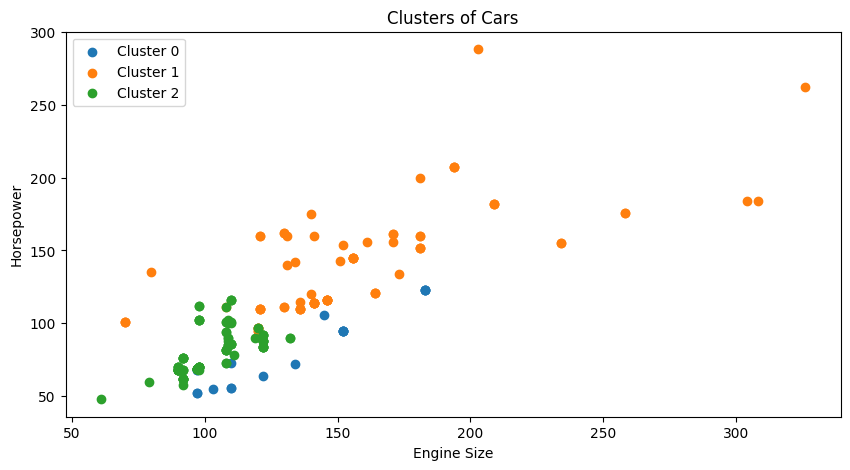

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# Display the first few rows of the dataset
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Select features for clustering
# Let's consider 'fueltype', 'enginesize', 'horsepower', 'citympg', 'highwaympg' for clustering
# Encoding 'fueltype' to numeric
df['fueltype'] = df['fueltype'].map({'gas': 0, 'diesel': 1})

# Selecting the relevant features
features = ['fueltype', 'enginesize', 'horsepower', 'citympg', 'highwaympg']
X = df[features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assume the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 5))
for cluster in np.unique(clusters):
    plt.scatter(df[df['Cluster'] == cluster]['enginesize'],
                df[df['Cluster'] == cluster]['horsepower'],
                label=f'Cluster {cluster}')

plt.title('Clusters of Cars')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.legend()
plt.show()



Program 9

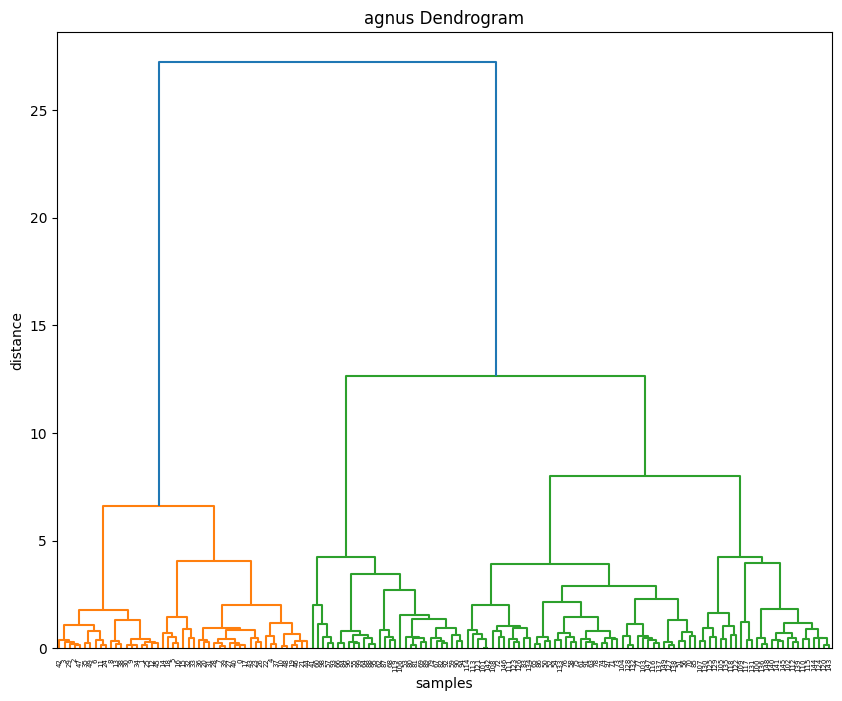

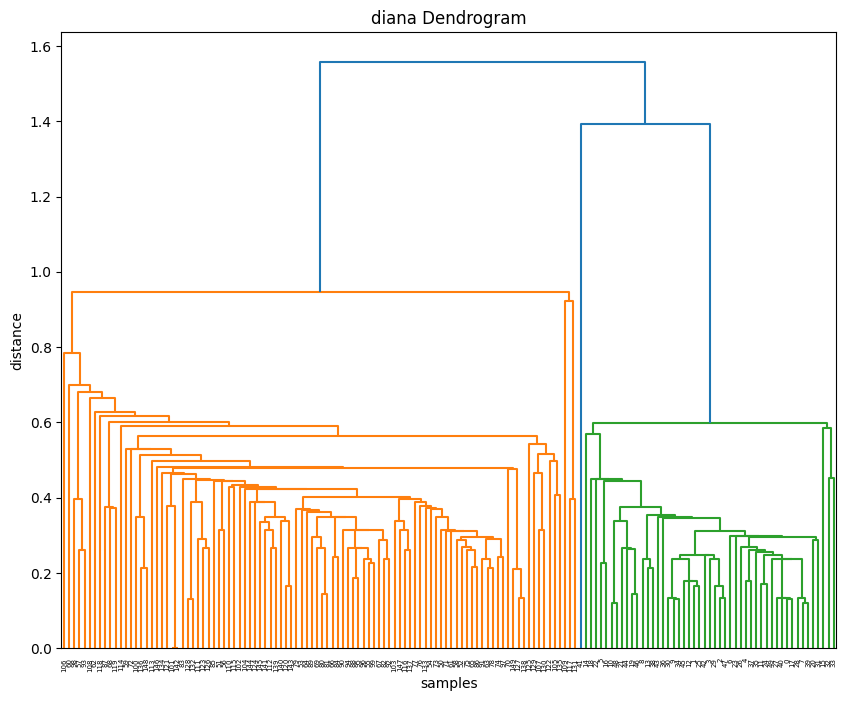

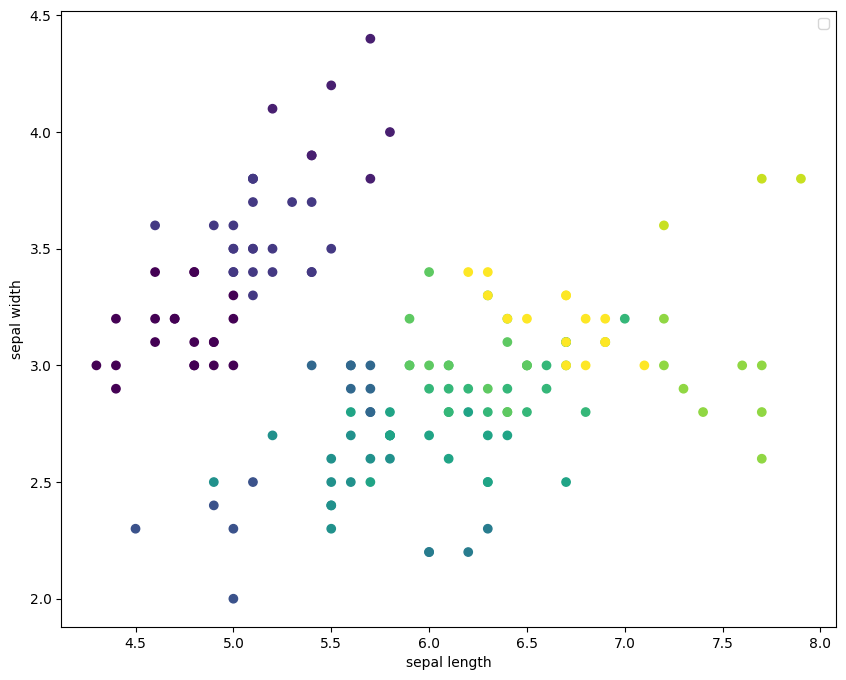

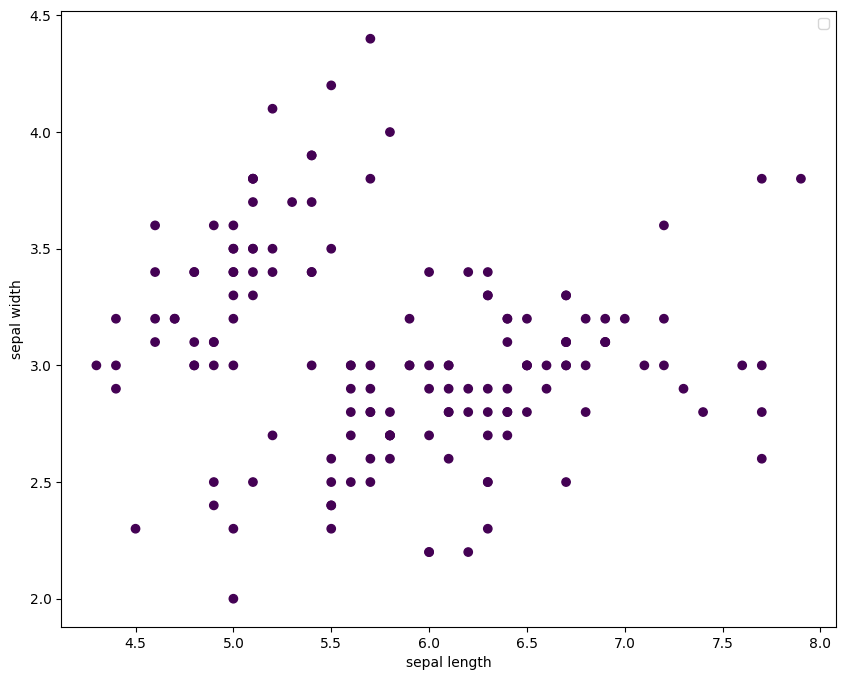

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.datasets import load_iris

data=load_iris()
X=data.data
y=data.target

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

plt.figure(figsize=(10,8))
plt.title('agnus Dendrogram')
dendrogram(linkage(X_scaled,method='ward'))
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()

plt.figure(figsize=(10,8))
plt.title('diana Dendrogram')
dendrogram(linkage(X_scaled,method='single'))
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()

threshold=2.5

agnus_clusters=fcluster(linkage(X_scaled,method='ward'),threshold,criterion='distance')
diana_clusters=fcluster(linkage(X_scaled,method='single'),threshold,criterion='distance')

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=agnus_clusters,cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=diana_clusters,cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

Program 10

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,confusion_matrix,matthews_corrcoef,ConfusionMatrixDisplay

df=pd.read_csv('/content/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

binarizer=Binarizer(threshold=0.5)
y_bin=binarizer.fit_transform(y.values.reshape(-1,1)).flatten()

X_train,X_test,y_train,y_test=train_test_split(X,y_bin,test_size=0.2,random_state=42)

adaboost=AdaBoostClassifier(random_state=42)
adaboost.fit(X_train,y_train)

xgboost=XGBClassifier(random_state=42)
xgboost.fit(X_train,y_train)

def evaluate_model(model,X_test,y_test):
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    # roc_auc=auc(y_test,y_pred)
    return accuracy,precision,recall,f1

adaboost_metrics=evaluate_model(adaboost,X_test,y_test)
xgboost_metrics=evaluate_model(xgboost,X_test,y_test)

print('adaboost',adaboost_metrics)
print('xgboost',xgboost_metrics)


adaboost (0.7337662337662337, 0.625, 0.6363636363636364, 0.6306306306306306)
xgboost (0.7077922077922078, 0.5806451612903226, 0.6545454545454545, 0.6153846153846153)
